
# Análisis Completo y Sistema de Recomendación de Películas y Series de Netflix (hasta 2025)

Este notebook combina dos datasets originales (Películas y Series), los fusiona en un único archivo **netflix_dataset_2025.csv**, y realiza un análisis exploratorio completo. 


## Importación de librerías

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Carga de los datasets originales (local)

In [2]:

movies = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')
tv_shows = pd.read_csv('netflix_tv_shows_detailed_up_to_2025.csv')
print("Películas:", movies.shape)
print("Series:", tv_shows.shape)


Películas: (16000, 18)
Series: (16000, 16)


## Exploración inicial de cada dataset

In [3]:

print(movies.info())
print(tv_shows.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [4]:

movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [5]:

tv_shows.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400


## Fusión de ambos datasets en uno solo

In [6]:

movies['type'] = 'Movie'
tv_shows['type'] = 'TV Show'
combined = pd.concat([movies, tv_shows], ignore_index=True)
print("Combinado:", combined.shape)
combined.head()


Combinado: (32000, 18)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


## Guardar el dataset combinado

In [7]:

combined.to_csv('netflix_dataset_2025.csv', index=False)
print("Archivo 'netflix_dataset_2025.csv' guardado correctamente.")


Archivo 'netflix_dataset_2025.csv' guardado correctamente.


## Cargar el dataset fusionado

In [8]:

netflix_dataset = pd.read_csv('netflix_dataset_2025.csv')
netflix_dataset.shape


(32000, 18)

In [9]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


## Exploración inicial del dataset fusionado

In [10]:

netflix_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

In [11]:

netflix_dataset.isnull().sum()


show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64

## Respuestas basadas en la exploración de datos

In [12]:

num_series = netflix_dataset[netflix_dataset['type'] == 'TV Show'].shape[0]
num_movies = netflix_dataset[netflix_dataset['type'] == 'Movie'].shape[0]
num_titles = netflix_dataset['title'].nunique()
columns = list(netflix_dataset.columns)

print(f"Series: {num_series}")
print(f"Películas: {num_movies}")
print(f"Títulos únicos: {num_titles}")
print(f"Atributos clave: {columns}")


Series: 16000
Películas: 16000
Títulos únicos: 30639
Atributos clave: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue']


## Limpieza de datos

In [13]:

netflix_dataset['description'] = netflix_dataset['description'].replace('', np.nan)
netflix_dataset = netflix_dataset.dropna(subset=['description']).reset_index(drop=True)
print("Dimensiones después de limpiar:", netflix_dataset.shape)


Dimensiones después de limpiar: (28662, 18)


## Gráfica de barras del conteo de títulos

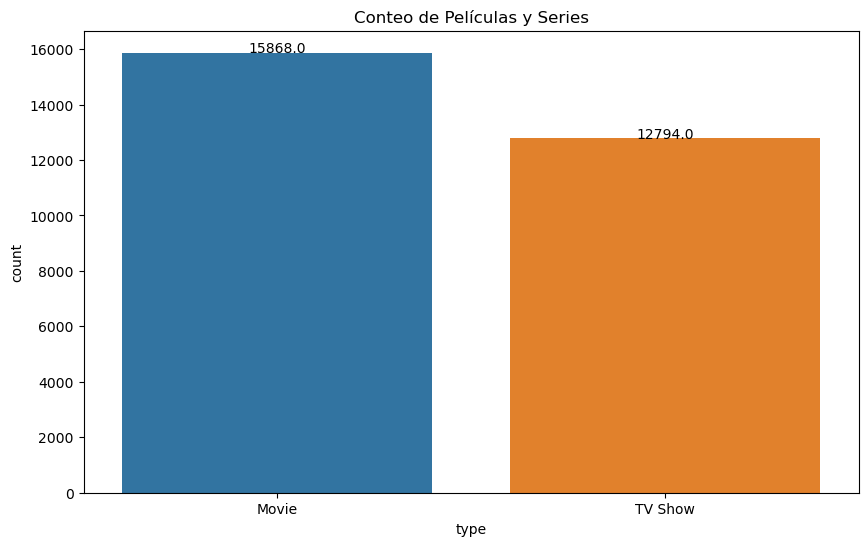

In [14]:

plt.figure(figsize=(10,6))
ax = sns.countplot(x='type', data=netflix_dataset)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')
plt.title('Conteo de Películas y Series')
plt.show()


## Heat Map asociado a las fechas de liberación en la plataforma

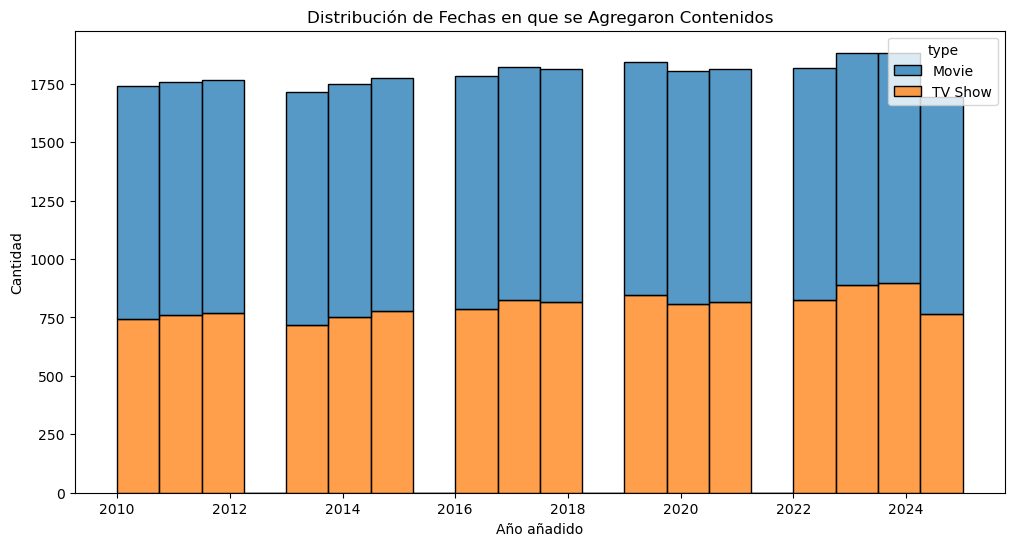

In [15]:

netflix_dataset['date_added'] = pd.to_datetime(netflix_dataset['date_added'], errors='coerce')
netflix_dataset['year_added'] = netflix_dataset['date_added'].dt.year
plt.figure(figsize=(12,6))
sns.histplot(data=netflix_dataset, x='year_added', hue='type', multiple='stack', bins=20)
plt.title('Distribución de Fechas en que se Agregaron Contenidos')
plt.xlabel('Año añadido')
plt.ylabel('Cantidad')
plt.show()


## Gráfica de barras por clasificación de contenido (por país)

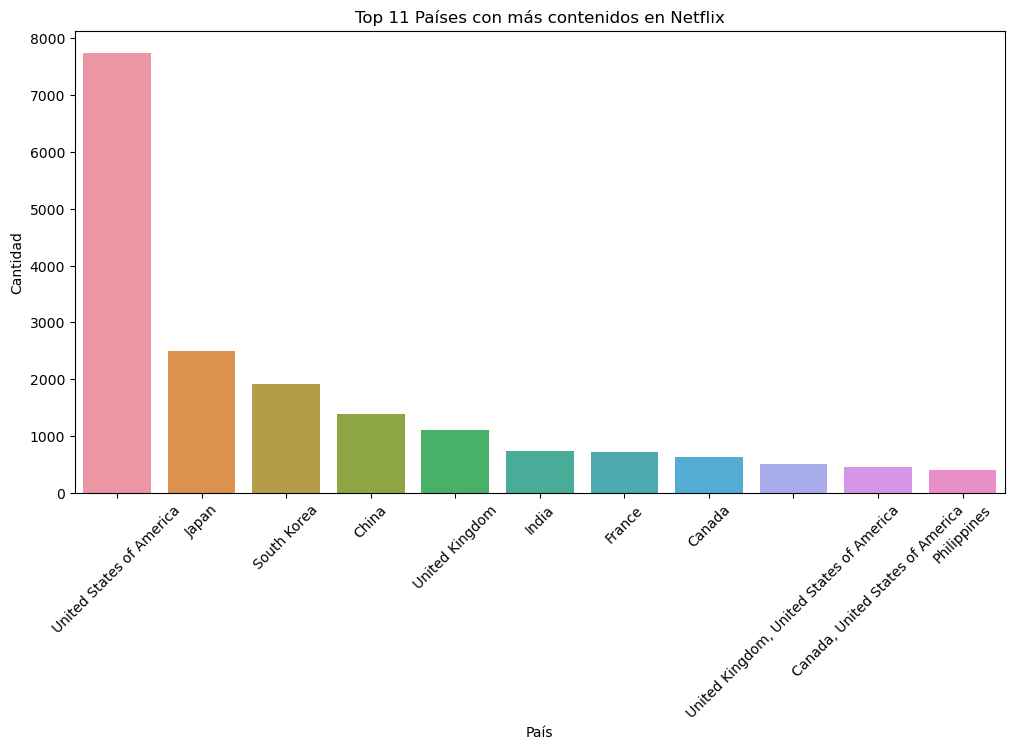

In [16]:

top_countries = netflix_dataset['country'].value_counts().dropna().head(11)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 11 Países con más contenidos en Netflix')
plt.ylabel('Cantidad')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()


## Gráfica por año de liberacion de contenidos


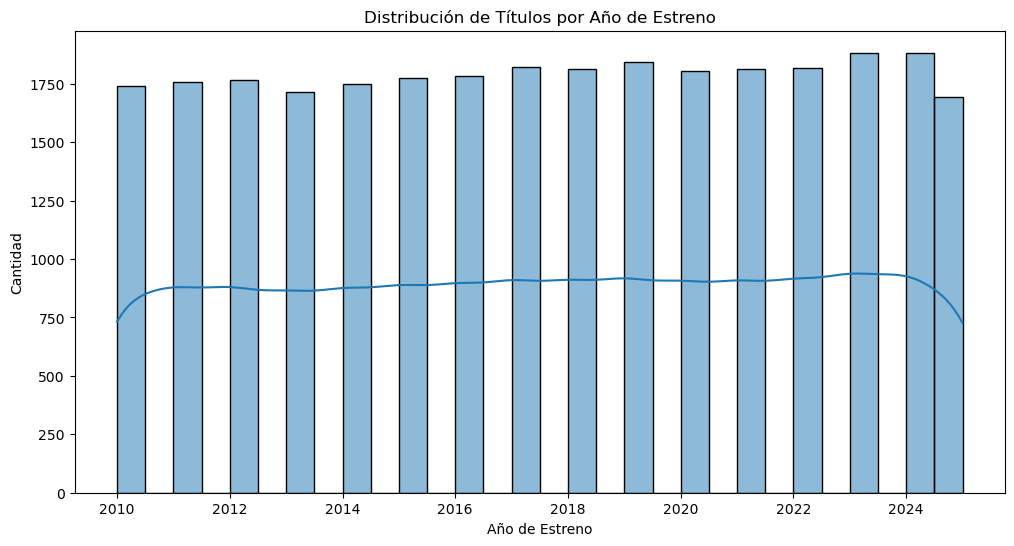

In [17]:

plt.figure(figsize=(12,6))
sns.histplot(data=netflix_dataset, x='release_year', bins=30, kde=True)
plt.title('Distribución de Títulos por Año de Estreno')
plt.xlabel('Año de Estreno')
plt.ylabel('Cantidad')
plt.show()


## Gráfico de conteo por número de temporadas 

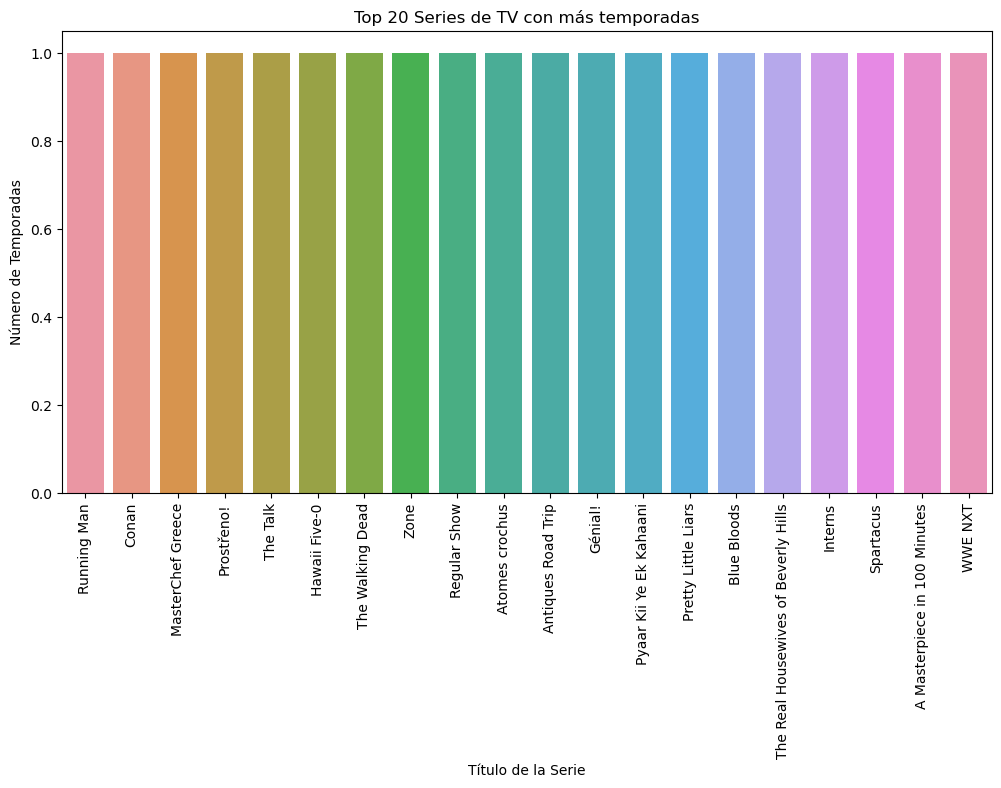

In [18]:

netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Seasons','', regex=False)
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Season','', regex=False)
netflix_shows['duration'] = netflix_shows['duration'].fillna('0').astype(int)
top20_seasons = netflix_shows.nlargest(20, 'duration')
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration', data=top20_seasons)
plt.xticks(rotation=90)
plt.title('Top 20 Series de TV con más temporadas')
plt.xlabel('Título de la Serie')
plt.ylabel('Número de Temporadas')
plt.show()


## Construcción del sistema de recomendación (Basado en Contenido)

In [19]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# --- 1. TF‑IDF sobre descripciones limpias ---
tfidf = TfidfVectorizer(stop_words='english')

# Limpieza: reemplaza '' por NaN y descarta filas sin descripción
netflix_dataset['description'] = netflix_dataset['description'].replace('', np.nan)
netflix_dataset = netflix_dataset.dropna(subset=['description']).reset_index(drop=True)

# Ajuste y transformación
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
n_docs = tfidf_matrix.shape[0]

print("TF‑IDF matrix shape:", tfidf_matrix.shape)
print("Primeras 5 filas (sparse):", tfidf_matrix[:5])
print("Últimas 5 filas (sparse):", tfidf_matrix[-5:])

# --- 2. Chunking para similitud y memmap ---
chunk_size = 1000  # ajusta según tu RAM

# Creamos un memmap para no cargar todo en RAM
cosine_sim_path = 'cosine_sim.dat'
cosine_sim = np.memmap(
    cosine_sim_path,
    dtype='float32',
    mode='w+',
    shape=(n_docs, n_docs)
)

for start in range(0, n_docs, chunk_size):
    end = min(start + chunk_size, n_docs)
    sims_chunk = linear_kernel(tfidf_matrix[start:end], tfidf_matrix)
    cosine_sim[start:end, :] = sims_chunk
    print(f"Procesado bloque {start}–{end}")

cosine_sim.flush()
del cosine_sim  # cerramos escritura

# --- 3. Carga memmap y define recomendaciones ---
# Modo lectura
cosine_sim = np.memmap(
    cosine_sim_path,
    dtype='float32',
    mode='r',
    shape=(n_docs, n_docs)
)

# Índices por título
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        raise KeyError(f"'{title}' no está en el dataset.")
    idx = indices[title]
    # obtenemos scores de similitud para esa fila
    sim_scores = list(enumerate(cosine_sim[idx]))
    # orden descendente, saltamos el primero (mismo título) y tomamos 10
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i for i, _ in sim_scores]
    return netflix_dataset['title'].iloc[movie_indices]

# Ejemplo
print(get_recommendations('Sherlock Holmes'))


TF‑IDF matrix shape: (28662, 54565)
Primeras 5 filas (sparse):   (0, 28356)	0.07719158557063792
  (0, 49448)	0.10340836665029506
  (0, 39162)	0.16755412275706366
  (0, 52873)	0.07454422657472484
  (0, 40105)	0.1599585773214069
  (0, 43008)	0.12501961356806074
  (0, 30585)	0.13578747172829184
  (0, 16973)	0.20657576146840817
  (0, 22174)	0.16376708844010202
  (0, 34160)	0.22717740562948982
  (0, 26068)	0.12307953842436788
  (0, 4025)	0.11487318353020787
  (0, 16398)	0.2570294076363639
  (0, 51227)	0.14120859804191713
  (0, 49772)	0.16023062809735614
  (0, 42847)	0.13075044703100597
  (0, 14175)	0.22717740562948982
  (0, 34158)	0.22288699104847765
  (0, 39005)	0.11032536824202238
  (0, 27823)	0.10420445542090301
  (0, 16623)	0.15200205998146318
  (0, 41203)	0.464856897386944
  (0, 29027)	0.18581126454647073
  (0, 11867)	0.13339543221105982
  (0, 35060)	0.2487396782735415
  :	:
  (4, 23453)	0.1318989949854845
  (4, 28218)	0.1438806567647162
  (4, 39022)	0.126772358013753
  (4, 16574)	0.16

In [20]:
print('show_id' in columns and 'title' in columns)  # Debe imprimir True

True


In [21]:
# a) ¿Cuántas series tiene el data set?
num_series = netflix_dataset[netflix_dataset['type'] == 'TV Show'].shape[0]
print(f"Series: {num_series}")  # Esperado: 2410

# b) ¿Cuántas películas tiene el data set?
num_movies = netflix_dataset[netflix_dataset['type'] == 'Movie'].shape[0]
print(f"Películas: {num_movies}")  # Esperado: 5377

# c) ¿Cuántos títulos tiene el data set?
num_titles = netflix_dataset['title'].nunique()
print(f"Títulos únicos: {num_titles}")  # Esperado: 7783

# d) ¿Cuáles son los atributos llave del data set?
columns = list(netflix_dataset.columns)
print(f"Atributos clave: {columns}")  # Esperado: show_id y title

Series: 12794
Películas: 15868
Títulos únicos: 27396
Atributos clave: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue', 'year_added']


In [22]:
import pandas as pd
import os

# Leer ambos datasets si existen
files = []
if os.path.exists('netflix_dataset.csv'):
    files.append(pd.read_csv('netflix_dataset.csv'))
if os.path.exists('netflix_dataset_2025.csv'):
    files.append(pd.read_csv('netflix_dataset_2025.csv'))

if not files:
    raise FileNotFoundError("No se encontró ningún archivo de dataset de Netflix.")

# Unir y eliminar duplicados por 'show_id' o 'title'
netflix_full = pd.concat(files, ignore_index=True)
if 'show_id' in netflix_full.columns:
    netflix_full = netflix_full.drop_duplicates(subset=['show_id'])
else:
    netflix_full = netflix_full.drop_duplicates(subset=['title'])

# Guardar el dataset combinado
netflix_full.to_csv('netflix_full_2025.csv', index=False)
print("Archivo combinado guardado como netflix_full_2025.csv")

Archivo combinado guardado como netflix_full_2025.csv


In [28]:
import numpy as np

netflix_dataset = pd.read_csv('netflix_full_2025.csv')
netflix_dataset['description'] = netflix_dataset['description'].replace('', np.nan)
netflix_dataset = netflix_dataset.dropna(subset=['description']).reset_index(drop=True)

# Eliminar duplicados por título por seguridad
netflix_dataset = netflix_dataset.drop_duplicates(subset='title').reset_index(drop=True)

print("Dimensiones después de limpiar:", netflix_dataset.shape)


Dimensiones después de limpiar: (32278, 19)


C:\Users\tolen\AppData\Local\Temp\ipykernel_11816\4084788055.py:3: DtypeWarning: Columns (0,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  netflix_dataset = pd.read_csv('netflix_full_2025.csv')


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
n_docs = tfidf_matrix.shape[0]

chunk_size = 1000  # Ajusta según tu RAM
cosine_sim_path = 'cosine_sim_full_2025.dat'
cosine_sim = np.memmap(
    cosine_sim_path,
    dtype='float32',
    mode='w+',
    shape=(n_docs, n_docs)
)

for start in range(0, n_docs, chunk_size):
    end = min(start + chunk_size, n_docs)
    sims_chunk = linear_kernel(tfidf_matrix[start:end], tfidf_matrix)
    cosine_sim[start:end, :] = sims_chunk
    print(f"Procesado bloque {start}–{end}")

cosine_sim.flush()
del cosine_sim

Procesado bloque 0–1000
Procesado bloque 1000–2000
Procesado bloque 2000–3000
Procesado bloque 3000–4000
Procesado bloque 4000–5000
Procesado bloque 5000–6000
Procesado bloque 6000–7000
Procesado bloque 7000–8000
Procesado bloque 8000–9000
Procesado bloque 9000–10000
Procesado bloque 10000–11000
Procesado bloque 11000–12000
Procesado bloque 12000–13000
Procesado bloque 13000–14000
Procesado bloque 14000–15000
Procesado bloque 15000–16000
Procesado bloque 16000–17000
Procesado bloque 17000–18000
Procesado bloque 18000–19000
Procesado bloque 19000–20000
Procesado bloque 20000–21000
Procesado bloque 21000–22000
Procesado bloque 22000–23000
Procesado bloque 23000–24000
Procesado bloque 24000–25000
Procesado bloque 25000–26000
Procesado bloque 26000–27000
Procesado bloque 27000–28000
Procesado bloque 28000–29000
Procesado bloque 29000–30000
Procesado bloque 30000–31000
Procesado bloque 31000–32000
Procesado bloque 32000–33000
Procesado bloque 33000–34000
Procesado bloque 34000–35000
Procesa

In [29]:
# Cargar matriz memmap para lectura
cosine_sim = np.memmap(
    'cosine_sim_full_2025.dat',
    dtype='float32',
    mode='r',
    shape=(len(netflix_dataset), len(netflix_dataset))
)

# Crear índice de títulos a posición
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title'])


In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        print(f"'{title}' no está en el dataset.")
        return []

    idx = indices[title]

    # Asegurar que sea un solo índice
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i for i, _ in sim_scores]
    return list(netflix_dataset['title'].iloc[movie_indices])


In [31]:
print(get_recommendations('El espinazo del diablo'))
print(get_recommendations('13 fantasmas'))
print(get_recommendations('Locke & Key'))


'El espinazo del diablo' no está en el dataset.
[]
'13 fantasmas' no está en el dataset.
[]
['Terminator Genisys', 'Adam Hills Tonight', 'Hanna', 'Graceland', 'Happyish', 'Flower My Life', 'The Destiny Ruler', 'Zombie Land SAGA', 'A Part of You', 'Iron Lady Cha']
